In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.special import erfc, erf
from scipy.stats import skew
import matplotlib

import pickle
import sys
import os

In [3]:

# Get the current working directory
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory
sibling_dir = os.path.join(parent_dir, "00_analytical_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_analytical_function_setup
import analytical as a

## Generate rewards for varying landscape smoothness

In [4]:
# Initialize vectors and matrices
xvec = np.linspace(-3, 6, num=300)
smoothnessvec = np.linspace(0.0, 1, num=11)
cutoff_vec = [6,5,4,4,4,3,3,3,2,1.5,-2] #to prevent numerical blowup, different cutoffs are needed once rewards are small enough
reward_matrix = np.zeros((len(xvec), len(smoothnessvec)))
tmax = 1000


sigmavec = np.sqrt((1 - smoothnessvec) / (1 + smoothnessvec))
# Compute reward matrix
for j, smoothness in enumerate(smoothnessvec):
    sigma = sigmavec[j]
    for i, x in enumerate(xvec):
        # Compute reward for each x, smoothness combination
        if x < cutoff_vec[j]:
            reward_matrix[i, j] = a.estimated_cumulative_reward_sigma(x, tmax, sigma)/tmax

c:\Users\kath\Documents\GitHub\explore-exploit\clean_code_for_sharing\00_analytical_function_setup\analytical.py:120: RuntimeWarning: divide by zero encountered in double_scalars
  term1 = 2 ** (-(1/2) - tmax) * np.exp(-(x**2 / (2 * sigma**2)))
c:\Users\kath\Documents\GitHub\explore-exploit\clean_code_for_sharing\00_analytical_function_setup\analytical.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  term2 = 2 ** (1 + tmax) * sigma * (-2 + tmax * erfc(x / (np.sqrt(2) * sigma)))
c:\Users\kath\Documents\GitHub\explore-exploit\clean_code_for_sharing\00_analytical_function_setup\analytical.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  term3 = sigma * (1 + erf(x / (np.sqrt(2) * sigma)))**tmax
c:\Users\kath\Documents\GitHub\explore-exploit\clean_code_for_sharing\00_analytical_function_setup\analytical.py:123: RuntimeWarning: divide by zero encountered in double_scalars
  term4 = 4 + tmax * erfc(x / (np.sqrt(2) * sigma))**2
c:\Users\kath\Document

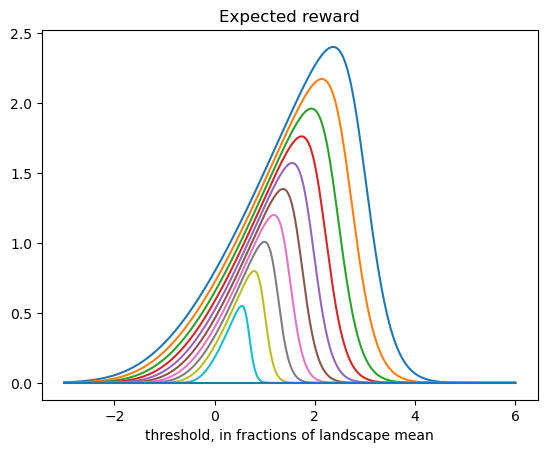

In [8]:
for j, smoothness in enumerate(smoothnessvec):
    plt.plot(xvec,reward_matrix[:,j])
    plt.xlabel('threshold, in fractions of landscape mean')
    plt.title('Expected reward')

plt.show()

In [9]:

# Create DataFrame with rounded xvec and smoothnessvec
reward_df = pd.DataFrame(
    reward_matrix.T,
    index=np.round(smoothnessvec, 1),
    columns=np.round(xvec, 3)
)

reward_df.head()

# Save the DataFrame to a CSV file
reward_df.to_csv('data/smoothness_analytical.csv')